# Module 7 - Lab, Part 1

# Introduction to Reinforcement Learning with Function Approximation


Up to now in this course we have only considered reinforcement learning problems with a small number of **discrete states**. These problems only required **tabular algorithms** for the solution of RL problems. However, tabular methods will not work in cases where the tables are too large to be held in computer memory, the computation time to sweep across states is too great, or where states do not have discrete values. 

But, many practical problems have either very large numbers of discrete states or have continuous states. Some example of such problems:  
1. A Game such as chess or backgammon with a great number of possible board states. While the number of states is **countably finite** there are far too many for tabular solutions. For example, consider that each piece in a chess game can occupy any of 64 positions, and that there are anywhere between 32 pieces and 2 pieces on the board at a given time step. This situation leads to an explosion in possible states. Other games, such a Go, have far more states than chess.   
2. A simple flight control system for a drone where the continuous state variables have an infinite number of states. These state variables would include 3-dimensional velocity, acceleration, and position, along with pitch yaw and role. All 12 of these variables have **continuous values** and, thus, an **infinite number of states**.   

To address such problems we must have a better representations. In this lesson we will focus on a powerful class of representations known as **function approximation**. By using function approximation we can represent a large number of states, even an infinite number, with a limited number of **parameters**. Function approximation RL problems of great complexity can be tackled, at least in theory.  

A reinforcement learning agent using function approximation is illustrated schematically in the figure below. 

<img src="img/AgentEnvironment.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Reinforcement Learning Agent with Function Approximation Representation and Environment** </center>  

In this lesson we will only address function approximation methods for **episodic** tasks. 

## Representation for Non-Tabular RL

The main question we will address in this lesson is what representations can we use when tabular methods will not work. The idea key idea is to **encode** a large, possibly infinite, number of states using a **few parameters**. Thus, **state values** or **action values** are represented by some **function of the state** of the environment.  

There are, in fact, many possible approaches to this problem. Here we will focus on function approximation methods of which a few examples are: 
1. Simple **linear** and **polynomial** representations,
2. **Fourier basis function** representations,
3. **Course coding** using overlapping circular or elliptical regions,
4. Various forms of **tile coding**,
5. **Radial basis functions** or kernels,
5. **Fully connected** deep neural networks, 
6. **Convolutional** deep neural networks. 

Each of the first five methods involve **coding** using some type of **basis function**. Basis functions rely on an implicit assumption that **nearby states have similar values**.  The representation is then **linear in the parameters** and **linear solution methods** are used to find these parameters. Linear methods have the advantage of computational efficiency. Further, at least for **on-policy** algorithms, **convergence is guaranteed**.     

The deep neural networks provide a distinctly nonlinear function approximation method. Typically, deep neural networks are used for **off-policy Q-Learning** methods. The convergence properties of these algorithms can be problematic. In fact, there are few guarantees of convergence with **off-policy function approximation** algorithms. The use of deep neural networks for Q-learning are the topic of Part 2 of this lab.    

### Tile coding

Tile coding is a flexible and expressive function approximation method. The basic idea is simple. The **state space is divided** into small patches using a regular pattern of **geometric shapes** or **tiles**. The function approximation has one parameter (weight) for each tile.    

An example tile coding of a two dimensional state space is shown in the figure below. In this case, a uniform 8x8 set of tiles are used, leading to a representation with 64 parameters. 

<img src="img/Tile1.JPG" alt="Drawing" style="width:300px; height:300px"/>
<center> **Two-dimensional state space encoded by 8x8 rectangular tiles** </center>

In the above diagram the states shown by **X** are in the same tile and will be coded with the same parameter. The states show by **O** are in different tiles and are coded with different parameters. 

However, the tile codings are far from unique. Consider the tiling of the same state space shown in the figure below. In this case the tiles are a 4X16 grid. As in the first case, there are still 64 parameters. 

<img src="img/Tile2.JPG" alt="Drawing" style="width:300px; height:300px"/>
<center> **Two-dimensional state space encoded by 4x16 rectangular tiles** </center>

In the above coding the states shown with **O** are in the same tile and represented by the same parameter. But, the states shown as **X** are now in different tiles and are represented by different parameters. 

A great many tile coding schemes are possible. Commonly, multiple tiling schemes are used simultaneously. This practice allows for the capture of information at **different scales**. 

## Function Approximation Error

As already noted, when tabular algorithms are not feasible, you must resort to function approximation. You can use function approximation for both state values, $\hat{v}(s)$, and action values, $\hat{q}(s,a)$. You should always keep in mind that we are dealing with **approximations** and will never know the true state values, $v_{\pi}(s)$, and action values, $q_{\pi}(s,a)$. There will always be some **error** between the true values and the approximated values. For example, for state value approximation we can express this error as the **mean squared value error**:

$$\overline{VE}(w) = \sum_{s \in S} \mu(s) \Big[ v_{\pi}(s) -  \hat{v}(s,\mathbf{w}) \Big]^2$$  

Here, $\mu(s)$ is a weight indicating how important the state $s$ is. For on-policy RL, $\mu(s)$ is a probability known as the **on-policy distribution**. 

A similar error metric can be constructed for $\hat{q}(s,a)$.  

In practical terms there is a trade-off between the complexity of the approximate representation and the error. More complex representations require more parameters, but have lower error and vice versa. This situation is exactly analogous to the bias-variance trade-off, familiar from machine learning.   

## Linear Function and Stochastic Gradient Decent

Following the foregoing discussion, basis function methods are linear in their parameters. In the following we will express these parameters as a vector of model weights, $\mathbf{w}$. We can then represent the approximate state value function with state $x(s)$ as:

$$\hat{v}(s,\mathbf{w}) = \mathbf{w}^T \mathbf{x}(s) =  \sum_{i=1}^d   w_i  x_i(s)$$

In principle, **stochastic gradient decent** algorithms are an efficient way to solve for the weights, $\mathbf{w}$. At each step the update is just:

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \alpha\ E_{\hat{p}data}\Big[ \nabla_{w} J(\mathbf{w}_t) \Big]\\
= \mathbf{w}_t + \alpha  \big[v_{\pi}(s) - \hat{v}(S_t, \mathbf{w}_t) \big]\nabla_w \hat{v}(S_t,\mathbf{w}_t)$$

where, $\hat{p}data$ is the mini-batch, and gradient is given by:   

$$\nabla_w \hat{v}(S_t,\mathbf{w}_t) = 
\begin{bmatrix} 
\frac{\partial \hat{v}(S_t,\mathbf{w}_t)}{\partial w_1} \\
\frac{\partial \hat{v}(S_t,\mathbf{w}_t)}{\partial w_2} \\
\vdots \\
\frac{\partial \hat{v}(S_t,\mathbf{w}_t)}{\partial w_d}
\end{bmatrix}$$


In many practical algorithms, $\hat{v}(s)$ is a **bootstrapped** approximation. This means the error term and gradient are not exact. We call such algorithms **semi-gradient decent** methods as they use an approximation of the gradient. This approach generally works well, but does not have the strong convergence guarantees of stochastic gradient decent. 

## The Mountain Car Problem

The [mountain car problem](https://en.wikipedia.org/wiki/Mountain_car_problem) was first proposed in the [Andew Moore's Ph.D. dissertation (1990)](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.17.2654). The mountain car problem has become a canonical testbed for many reinforcement learning algorithms. 

In this problem an under-powered car must climb a steep hill. However, the car does not have sufficient engine power to climb the grade. The car must travel up another hill in order to gain sufficient speed (actually kinetic energy) to climb the large hill. 

The position, $x$, and velocity, $\dot{x}$, of the car are the state variables. The updates of the state variables at each time step are determined by the following equations: 

$$x' = x + \dot{x} \\
\dot{x}' = \dot{x} + 0.001 * \ddot{x} - 0.0025 * cos(3 * x)$$

The object of this problem is to find the optimal acceleration given the car state to allow the car to get to the top of the hill. The car has three acceleration states, $\ddot{x}$, which must be selected by the agent:

$$\ddot{x} = \{ -1.0, 0.0, 1.0 \}$$

The position and velocity are bounded, with the goal at the upper bound of position:

$$-1.2 \le x \le 0.5 \\
-0.07 \le \dot{x} \le 0.07$$

The reward at each time step is -1.0 and the reward for reaching the goal is 100.  

The car is randomly initialized using a uniform distribution:

$$p(x_0) = uniform(-0.6 \le x_0 \le -0.4)$$

### The mountain car problem is hard

At first glance, the mountain car problem may seem like it should have an easy solution. However, looks are deceptive. The learning an optimal policy for this problem is difficult. In fact, conventional control theory approaches fail to provide solutions. Some reasons for this difficulty include:
1. The non-linear coupling between the two state variables, which makes the state transitions between the infinite number of states hard to predict.
2. The delayed reward which is only observed when the goal is achieved. This fact is common to many difficult RL problems. 

### Simulation of car environment

The code in the cell below **simulates the car environment**. Two functions are used by the agent to interact with the environment:
1. The `sim_car` function returns a state transition and a reward, given the agent's current state and an action. In addition, a flag is returned to indicate if the goal has been reached.
2. The `initialize_car` function returns a random starting position for the car within the specified bounds. 

Taken together, calls to these two functions define the **boundary between the agent and the environment**. Execute the code in the cell below to exercise these functions and examine the resulting plots for a case where the acceleration is set to 0. 

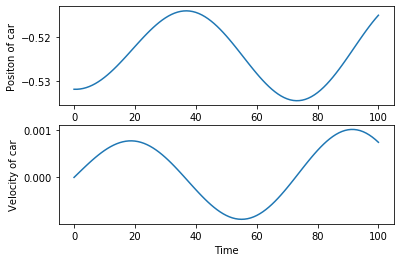

In [1]:
from math import cos
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

def sim_car(x, x_dot, acceleration, x_lims = (-1.2,0.5), x_dot_lims = (-0.07,0.07)):
    ## Compute velocity within limits
    x_dot_prime = x_dot + 0.001 * acceleration - 0.0025 * cos(3 * x)
    if(x_dot_prime < x_dot_lims[0]): x_dot_prime = x_dot_lims[0]
    if(x_dot_prime > x_dot_lims[1]): x_dot_prime = x_dot_lims[1]
        
    ## Now update position
    x_prime = x + x_dot
    if(x_prime < x_lims[0]): x_prime = x_lims[0]
    if(x_prime > x_lims[1]): x_prime = x_lims[1]
      
    ## At the terminal state or not and set reward
    if(x_prime >= x_lims[1]): 
        done = True
        reward = 100.0
    else: 
        done = False
        reward = -1.0
        
    return(x_prime, x_dot_prime, done, reward)    
        
def initalize_car(x_lims = (-0.6,-0.4)):
    ## Find random start for car
    return(nr.uniform(x_lims[0],x_lims[1]))

## Test the function
a = -0.0
x_dot = [0.0]
x = [initalize_car()]
for i in range(100):
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    
def plot_car(x, x_dot):    
    ## Plot car position
    fig = plt.figure()
    ax1 = fig.add_subplot(211)    
    ax1.plot(x)
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(212)  
    ax2.plot(x_dot)
    ax2.set_ylabel('Velocity of car')
    ax2.set_xlabel('Time')
    
plot_car(x,x_dot)    

With no acceleration applied, the car oscillates back and forth. The motion is not damped since the simulator includes no friction term. 

Next, execute the code in the cell below and observe the effect of using a constant positive acceleration.

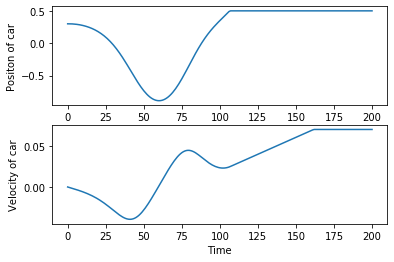

In [2]:
## Test the function with positive acceleration
a = 1.0
x_dot = [0.0]
#x = [initalize_car()]
x = [0.3]
for i in range(200):
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    
plot_car(x,x_dot) 

As before, the motion of the car is periodic initially. Finally, the car reaches the top of the hill. 

Finally, execute the code in the cell below to observe the effect of negative acceleration. 

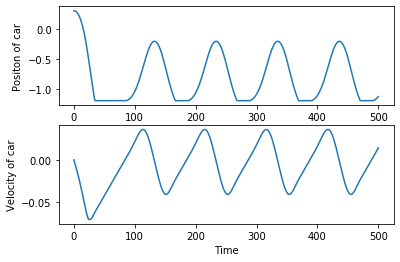

In [3]:
## Test the function with negative acceleration
a = -1.0
x_dot = [0.0]
#x = [initalize_car()]
x = [0.3]
for i in range(500):
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    
plot_car(x,x_dot) 

The position state of the car, quickly hits the negative limit. It then oscillates periodically thereafter approaching, but not quite hitting the limit. 

### Heuristic mountain car solution

While learning optimal policy for the mountain car problem is rather difficult, it is not to hard to find a good heuristic solution. There are two basic observations on which to base a heuristic:
1. The car should accelerate in the direction of the slope when traveling up hill to maximize the height to which it can climb. 
2. The car should accelerate in the opposite direction to the slope when traveling down hill to maximize the speed the car has for climbing the opposite hill. 

The code in the cell below implements this heuristic and plots the result. 

Starting positon = -0.5025341701024909


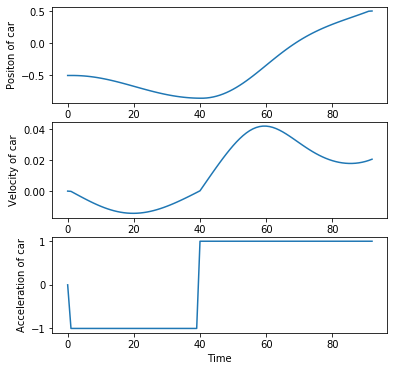

In [4]:
def plot_car_a(x, x_dot, a):    
    ## Plot car position
    fig = plt.figure(figsize = (6,6))
    ax1 = fig.add_subplot(311)    
    ax1.plot(x)
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(312)  
    ax2.plot(x_dot)
    ax2.set_ylabel('Velocity of car')
    
    ## PLot acceleration
    ax2 = fig.add_subplot(313)  
    ax2.plot(a)
    ax2.set_ylabel('Acceleration of car')
    ax2.set_xlabel('Time')

    
def heuristic_control(x, x_dot):
    ## Set acceleration to +1, -1 or 0 based on postion and velocity
    if((x > 0.0 and x_dot > 0.0) or (x < 0.0 and x_dot > 0.0)): a = +1.0
    elif((x < 0.0 and x_dot < 0.0) or (x > 0.0 and x_dot < 0.0)): a = -1.0
    else: a = 0.0
    return(a)    

        
## Initialize the car state
a = [0.0]
x_dot = [0.0]
x = [initalize_car()]
print('Starting positon = ' + str(x[0]))

## Iterate until termination
i = 0    
done = False
while not done:
    ## Update the position and velocity    
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a[i])
    x.append(x_temp)
    x_dot.append(x_dot_temp)
        
    ## Update acceleration using the heuristic
    i = i + 1    
    a.append(heuristic_control(x[i], x_dot[i]))
        
plot_car_a(x,x_dot,a)     

Examine the plots produced. The car position chart shows a fairly quick convergence to the goal state. The acceleration chart shows the heuristic policy is followed. However, this cannot be considered an optimal policy. Notice that the car stays at nearly constant position of about -1.2 for a number of time steps. Nothing was gained in terms of achieving the goal in this period. 

## Tile Coding N-Step SARSA Solution for Mountain Car Problem

Now, we will apply tile coding along with N-step SARSA to the solution of the mountain car problem. Using tile coding results in a representation linear in the weights for each tile. 

### Tile coding the state variables

There are two state variables for the mountain car problem, position and velocity. In this case, we will use a 10x10 grid of uniform tiles for each of the 3 actions. This coding results in **300 weights** representing the **action values** for each possible combination of the state variables. 

The code in the cell below computes the tile assignment for the velocity state variable, $x$. The range of possible values within the velocity limits is divided into 10 equal segments. Execute the code and examine the results of the test.

In [5]:
def x_state(x, x_lims = (-1.2,0.5), n_tiles = 10):
    """Function to compute tile state given positon"""
    state = int((x - x_lims[0])/(x_lims[1] - x_lims[0]) * float(n_tiles))
    if(state > n_tiles - 1): state = n_tiles - 1
    return(state)

for x in list(np.linspace(-1.2,0.5,20)):
    print('x = ' + str(x) + ' state = ' + str(x_state(x)))    

x = -1.2 state = 0
x = -1.1105263157894736 state = 0
x = -1.0210526315789474 state = 1
x = -0.9315789473684211 state = 1
x = -0.8421052631578947 state = 2
x = -0.7526315789473683 state = 2
x = -0.6631578947368421 state = 3
x = -0.5736842105263158 state = 3
x = -0.4842105263157894 state = 4
x = -0.39473684210526305 state = 4
x = -0.3052631578947368 state = 5
x = -0.21578947368421053 state = 5
x = -0.12631578947368416 state = 6
x = -0.03684210526315779 state = 6
x = 0.05263157894736836 state = 7
x = 0.14210526315789473 state = 7
x = 0.2315789473684211 state = 8
x = 0.3210526315789475 state = 8
x = 0.41052631578947385 state = 9
x = 0.5 state = 9


The code in the cell below tile encodes the velocity state variable into 10 equal segments between the limits. Execute this code and examine the results of the test. 

In [6]:
def x_dot_state(x_dot, x_dot_lims = (-0.07,0.07), n_tiles = 10):
    """Function to compute tile state given velocity"""
    state = int((x_dot - x_dot_lims[0])/(x_dot_lims[1] - x_dot_lims[0]) * float(n_tiles))
    if(state > n_tiles - 1): state = n_tiles - 1
    return(state)

for x in list(np.linspace(-0.07,0.07,20)):
    print('x_dot = ' + str(x) + ' state = ' + str(x_dot_state(x)))    

x_dot = -0.07 state = 0
x_dot = -0.06263157894736843 state = 0
x_dot = -0.05526315789473685 state = 1
x_dot = -0.04789473684210527 state = 1
x_dot = -0.04052631578947369 state = 2
x_dot = -0.03315789473684211 state = 2
x_dot = -0.02578947368421053 state = 3
x_dot = -0.01842105263157895 state = 3
x_dot = -0.01105263157894737 state = 4
x_dot = -0.00368421052631579 state = 4
x_dot = 0.00368421052631579 state = 5
x_dot = 0.01105263157894737 state = 5
x_dot = 0.01842105263157895 state = 6
x_dot = 0.02578947368421053 state = 6
x_dot = 0.03315789473684211 state = 7
x_dot = 0.04052631578947369 state = 7
x_dot = 0.04789473684210527 state = 8
x_dot = 0.05526315789473685 state = 8
x_dot = 0.06263157894736843 state = 9
x_dot = 0.07 state = 9


These two functions provide a lookup method for the index of the tile along the two state variable dimensions. 

### N-Step SARSA for Tile Coding

The code in the cell below implements N-step SARSA for the simple tile coding scheme. The N-step SARSA learns the weights for the tiles. Technically, this is a **semi-gradient decent** algorithm since bootstrapped values are used for the weight updates. 

The **approximate action value** for a given state and action, $x_i(s,a)$, given the $d$ tile weights, $w_i$, can be computed as:

$$q(s,a) \approx \hat{q}(s,a,\mathbf{w}) = \sum_{i=1}^d  w_i  x_i(s,a)$$

The state action variables, $x_i(s,a)$, are binary indicators:

$$x_i(s,a) = 1\ if\ in\ tile\ i\\
x_i(s,a) = 0\ otherwise$$

The weight update for the N-step SARSA tile coding algorithm, given rewards $R_t$, the N-step bootstrapped return is expressed as:  

$$G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + \ldots + \gamma^{n-1} R_{t+n} + \gamma^n \hat{q}(S_{t+n}, A_{t+n}, w_{t+n-1})$$

Using this return, the action value update becomes:

$$w_{t+n}(S_t, A_t) = w_{t+n-1} + \alpha \big[ G_{t:t+n} -\hat{q}(S_{t+n}, A_{t+n}, w_{t+n-1}) \big]\ \nabla\hat{q}(S_{t}, A_{t}, w_{t+n-1})$$

Where   
$\delta_t =  G_{t:t+n} - \hat{q}(S_{t+n}, A_{t+n}, w_{t+n-1}) = $ the n-step TD error, and   
$\nabla\hat{q}(S_{t}, A_{t}, w_{t+n-1}) = $ the gradient of the action value approximation. 

Given the linear relationship between $\hat{q}(S_{t}, A_{t}, w_{t+n-1})$ and $w_{t+n-1}$ the gradient is easy to compute: $\nabla\hat{q}(S_{t}, A_{t}, w_{t+n-1}) = 1$ for cases where $x_i(s,a) = 1$.

In the algorithm presented, actions are selected using an $\epsilon$-greedy approach. 

As with other N-step SARSA algorithms there as a bit of bookkeeping. Further details of this algorithm can been obtained by reading the code comments. 

Execute this code and examine the results of the test case. 

In [7]:
def tile_SARSA(episodes = 1000, gamma = 0.9, epsilon = 0.05, alpha = 0.02, 
               n = 4, goal = 0.5, a_knot = 0.0, x_dot_knot = 0.0):
    ## Possible actions
    actions = [-1.0,0.0,1.0]
    
    ## Initialize the weight array for action, position, velocity
    w = np.zeros((3,10,10))

    ## Loop over the episodes
    for _ in range(episodes):
        ## Initialize the car state
        a = [a_knot]
        a_index = 1
        x_dot = [x_dot_knot]
        x_dot_index = x_dot_state(x_dot[0])
        x = [initalize_car()]
        x_index = x_state(x[0])
        
        t = 0 # Initialize the time step count
        T = float("inf")
        tau = 0
        reward_list = [] 
        
        done = False
        i = 0 # Index for accumulting position and velocity steps
        while(not done):
            if(t < T):
                ## Update postion and velocity of the car given action and get the reward
                x_prime, x_dot_prime, done, reward = sim_car(x[i], x_dot[i], a[i])
                reward_list.append(reward)  # append the reward to the list
        
                ## The next state given the action
                x_prime_index = x_state(x_prime)
                x_dot_prime_index = x_dot_state(x_dot_prime)
        
            if(done): T = t + 1  # We reached the terminal state
            else:
                # Select and store the next action using the policy with epslion greedy approach
                if(nr.uniform() > epsilon):
                    a_prime_index = np.where(w[:,x_prime_index,x_dot_prime_index] == np.max(w[:,x_prime_index,x_dot_prime_index]))
                    ## break the tie if needed
                    if(a_prime_index[0].shape[0] > 1): a_prime_index = nr.choice(a_prime_index[0])
                    else: a_prime_index = a_prime_index[0][0] 
                    a_prime = actions[a_prime_index]
                else:
                    a_prime_index = nr.choice(range(3)) #[0]
                    a_prime = actions[a_prime_index]
           
            tau = t - n + 1 ## update the time step being updated
  
            if(tau >= 0): # Check if enough time steps to compute return
                ## Compute the return
                ## The formula for the first index in the loop is different from Sutton and Barto
                ## but seems to be correct at least for Python.
                G = 0.0 
                for j in range(tau, min(tau + n, T)):
                    G = G + gamma**(j-tau) * reward_list[j]   
                ## Deal with case of where we are not at the terminal state
                if(tau + n < T): G = G + gamma**n * w[a_prime_index,x_prime_index,x_dot_prime_index] 
                ## Finally, update w
                w[a_index,x_index,x_dot_index] = w[a_index,x_index,x_dot_index] + alpha * (G - w[a_index,x_index,x_dot_index])        
    
            ## Set action and state for next iteration
            if(x_prime <= goal):
                a_index = a_prime_index
                x_index = x_prime_index
                x_dot_index = x_dot_prime_index  
                a.append(a_prime) 
                x.append(x_prime)
                x_dot.append(x_dot_prime)
                i = i + 1

            ## increment t
            t = t + 1
    return(w)  

print(np.round(tile_SARSA(episodes = 10000), 2))    

[[[-9.960e+00 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01
   -1.000e+01 -1.000e+01  0.000e+00  0.000e+00]
  [-9.990e+00 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01
   -1.000e+01 -1.000e+01 -9.990e+00  0.000e+00]
  [-1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01
   -1.000e+01 -9.990e+00 -9.980e+00 -9.950e+00]
  [-1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01
   -1.000e+01 -9.990e+00 -9.960e+00 -9.930e+00]
  [-1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01
   -1.000e+01 -9.990e+00 -9.890e+00 -9.850e+00]
  [-1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01
   -1.000e+01 -9.970e+00 -9.680e+00 -9.640e+00]
  [-5.920e+00 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01 -1.000e+01
   -9.980e+00 -9.860e+00 -9.010e+00 -9.150e+00]
  [ 0.000e+00 -9.810e+00 -1.000e+01 -1.000e+01 -1.000e+01 -9.990e+00
   -9.860e+00 -7.950e+00 -7.550e+00 -7.190e+00]
  [ 0.000e+00  0.000e+00 -9.850e+00 -9.990e+00 -1.000e+01 -9.930

There are 300 weight values represented in the above array. Notice that generally the weights, and thus the action values, increase with larger values of position which are closer to the goal. 

The code in the cell below uses the results of N-step SARSA to compute a policy. The action is selected in a greedy manner based on the action values. 

In [8]:
def tile_SARSA_policy(episodes = 1000, gamma = 0.9, epsilon = 0.05, alpha = 0.02, 
                   n = 4, goal = 0.5, a_knot = 0.0, x_dot_knot = 0.0):
    ## Possible actions
    actions = [-1.0,0.0,1.0]
    
    ## Evaluate policy with SARSA
    Q = tile_SARSA(episodes = episodes, gamma = gamma, epsilon = epsilon, alpha = alpha, 
                         n = n, goal = goal, a_knot = a_knot, x_dot_knot = x_dot_knot)
    Q_shape = Q.shape
    
    ## Array to hold policy
    policy = np.zeros((Q_shape[1],Q_shape[2]))
    
    ## Loop over postions
    for x_index in range(Q_shape[1]):
        ## Loop over velocity
        for x_dot_index in range(Q_shape[2]):
            ## Find the index with max Q
            a_index = np.where(Q[:,x_index,x_dot_index] == np.max(Q[:,x_index,x_dot_index]))
            ## Break the tie by using 0 acceleration
            if(a_index[0].shape[0] > 1 ): a_index = 1
            else: a_index = a_index[0][0]    
            
            ## Now fill in the policy array
            policy[x_index,x_dot_index] = actions[a_index]
                    
    return(policy)                    
 

SARSA_Tile_Policy = tile_SARSA_policy(episodes = 5000)   
SARSA_Tile_Policy

array([[ 1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  1.,  1.,  1.,  0.,  1., -1.,  0.],
       [-1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [-1., -1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1., -1.,  0., -1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 0., -1., -1., -1., -1., -1.,  0.,  0., -1.,  1.],
       [ 0.,  0., -1., -1.,  1., -1.,  1.,  0.,  1.,  1.],
       [ 0.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.],
       [ 0.,  0., -1., -1., -1.,  1., -1.,  1.,  1.,  0.],
       [ 0.,  0.,  0., -1., -1.,  0.,  1.,  1., -1.,  0.]])

The result is an array with actions specified for each tile in the coding scheme. This policy is not truly optimal since we are using a coarse coding and limited the number of episodes to 5,000. 

We can get a better felling for how this policy changes with state (position and velocity) by plotting the policy array. The color coding indicates the action given the state as parameterized with the tile coding. Execute the code in the cell below and examine the results. 

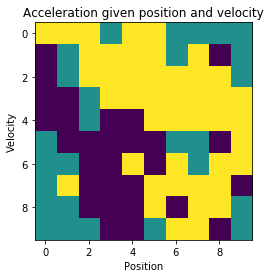

In [9]:
def display_policy(policy):
    plt.imshow(policy)
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Acceleration given position and velocity')
    
display_policy(SARSA_Tile_Policy)    

This display shows that the policy is not really optimal. For the most part, positive acceleration is applied when the case is traveling toward the goal. However, in some cases negative acceleration is applied. Further, negative acceleration is not applied in all the cases one should expect, and there are many states for which 0 acceleration is used. 

The code in the cell below applies the computed policy to one episode of the mountain car problem. The car is started with a random initial velocity and the policy is followed until the goal is achieved. Charts of results are then plotted. Execute this code and examine the results. 

Starting positon = -0.47597285710887155


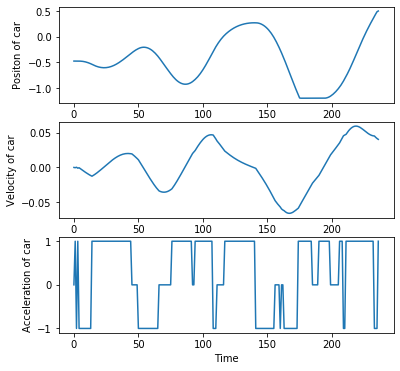

In [10]:
## Initialize the car state
a = [0.0]
x_dot = [0.0]
x = [initalize_car()]
print('Starting positon = ' + str(x[0]))

## Iterate until termination
i = 0    
done = False
while not done:
# for _ in range(1000):    
    ## Update the position and velocity    
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a[i])
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    
    ## Get the indices
    x_index = x_state(x[i])
    x_dot_index = x_dot_state(x_dot[i])
        
    ## Update acceleration using the heuristic
    i = i + 1    
    a.append(SARSA_Tile_Policy[x_index, x_dot_index])
        
plot_car_a(x,x_dot,a)     

The car reaches the goal in a reasonable number of time steps, however, it is clear from these charts this is not an optimal policy. For example, notice how many time steps have no acceleration applied. 

If you have time you can run the above code blocks for 10,000, 20,000 or even larger numbers of episodes. You can also use a finer weight grid or overlapping weight grids. You should see an notable improvement in the policy.